In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

In [3]:
# (do not change this code)
words = open('names.txt').read().splitlines()
words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [10]:
# (do not change this code)
chars = sorted(list(set([c for w in words for c in w ])))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
#create a dictionnary that associates to a letter its order in the alphabet (. has index 0 associated)

In [11]:
# (do not change this code)
itos = {i:s for s,i in stoi.items()}
#associate a letter to a number between 0 and 27 (the given letter in alphabet)


In [ ]:
# Exercise 1: build a simple bigram model for next-character prediction
# - store the co-counts of each character in a 27x27 matrix N
# - compute the normalized probabilities into a matrix P
# - generate a bunch of samples from the model using P and torch.multinomial

In [28]:
N = torch.zeros(27,27)
for w in words:
    w = '.' + w + '.'
    k = len(w)
    for i in range(k-1):
        j = i+1
        c1 = w[i]
        c2 = w[j]
        i1 = stoi[c1]
        i2 = stoi[c2]
        N[i1][i2]+=1 #count the nbr of apparition of the association of letters (c1, c2) (pr(c2 given c1))

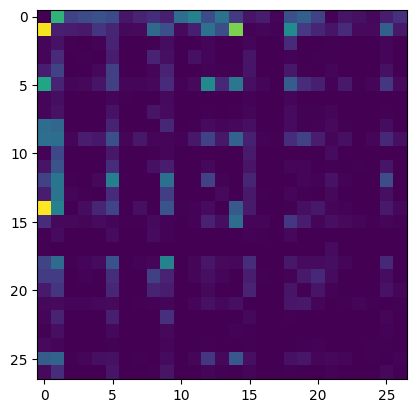

In [29]:
# display the matrix
plt.imshow(N)
plt.show()

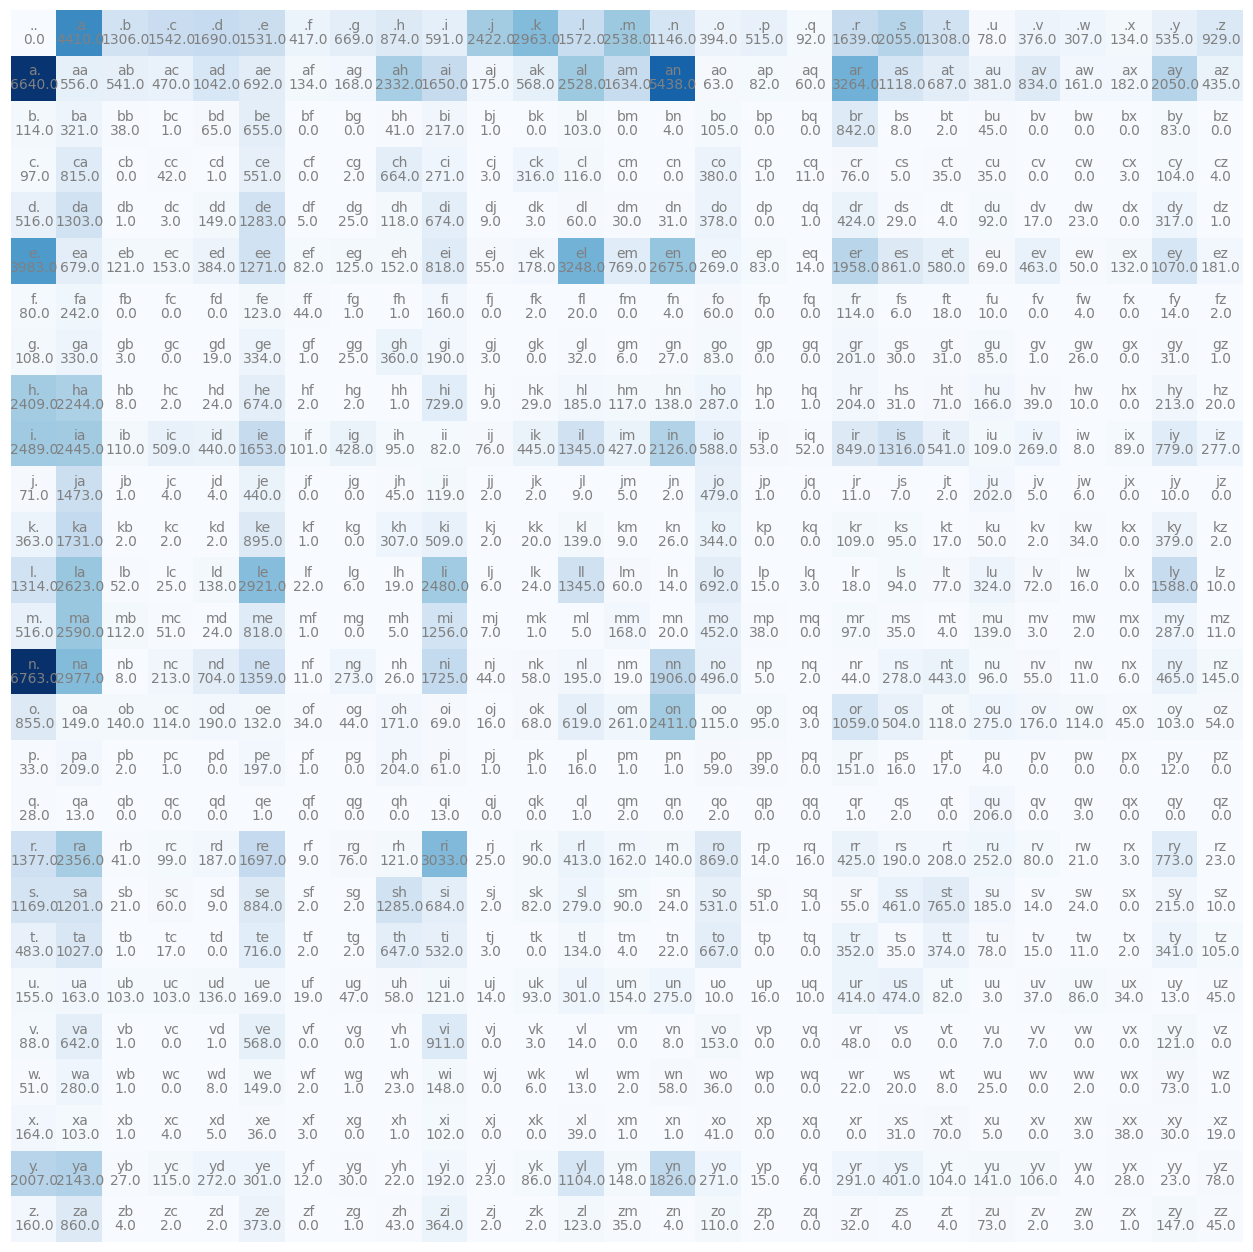

In [30]:
#display the matrix in human-readable format
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j] #display the combinaison of character
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')
plt.show()

In [31]:
# useful to reproduce results
g = torch.Generator().manual_seed(2147483647)

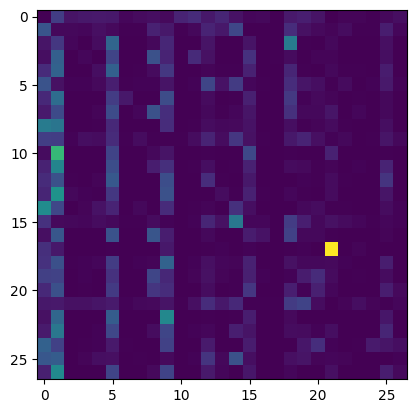

In [32]:
P = N/N.sum(axis=1, keepdim=True) #matrix normalized 
plt.imshow(P)

In [33]:
# sample 30 words from the model (hint: use torch.multinomial)
for _ in range(30):
    ix = 0
    out = []
    while True:
        p = P[ix] #pr(l given .) = pr(first letter)
        ix = torch.multinomial(p, 1, replacement= True, generator=g).item() #draw new letter based on probs
        out.append(itos[ix]) #add indice associate to the letter drawed to out
        if ix==0: #no character anymore (fell on .)
            break
    print("".join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.
feniee.
zem.
deru.
firit.
gaikajahahbevare.
kiysthelenaririenah.
keen.
x.
al.
kal.


In [ ]:
# Exercise 2: build the same bigram model using the NLL loss
# - the dataset is created and encoded for you
# - create the weights matrix W
# - build a training loop to minimize the NLL
# - sample from the model

In [34]:
# create a training set for bigram model (based on file words)
# (do not change this code) 
xs = []
ys = []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]): #for each couple of (letter1, letter2,3,...)
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

In [49]:
import torch.nn.functional as F

In [ ]:
g = torch.Generator().manual_seed(2147483647)
W = torch.ones(27,27)
W.requires_grad= True

In [39]:
import torch.nn.functional as F
lr=10
# training loop
for k in range(400):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()  
    logits = xenc @ W                             
    counts = logits.exp()
    probs = counts / counts.sum(dim=1, keepdim=True) #softmax(x)= exp(z)/sum(exp(z))
    loss = -torch.log(probs[torch.arange(len(xs)), ys]).mean()

    # backward pass
    loss.backward()

    # update (the gradients)
    W.data += - lr* W.grad 
    W.grad= torch.zeros(27,27) #reinitialise grad

    print(loss.item())

3.29583740234375
3.242161273956299
3.192321300506592
3.1463794708251953


3.1043200492858887
3.0660340785980225
3.031327962875366
2.9999351501464844
2.9715421199798584
2.9458181858062744
2.9224400520324707
2.901108503341675
2.8815622329711914
2.8635754585266113
2.84696102142334
2.831561803817749
2.8172481060028076
2.8039088249206543
2.791452407836914
2.7797982692718506
2.768876552581787
2.7586255073547363
2.748990774154663
2.739922523498535
2.7313764095306396
2.7233128547668457
2.7156941890716553
2.708487033843994
2.7016611099243164
2.695188283920288
2.6890430450439453
2.6832022666931152
2.6776442527770996
2.672349452972412
2.667299747467041
2.6624786853790283
2.657871723175049
2.6534647941589355
2.649244785308838
2.645200252532959
2.6413207054138184
2.6375956535339355
2.634016752243042
2.6305744647979736
2.6272618770599365
2.6240713596343994
2.6209962368011475
2.618030548095703
2.615168571472168
2.6124043464660645
2.6097331047058105
2.6071503162384033
2.604651689529419
2.602233409881592
2.599891185760498
2.597620964050293
2.5954203605651855
2.59328556060791

In [40]:
# finally, sample from the neural net model
g = torch.Generator().manual_seed(2147483647)

for k in range(10):
    out = []
    ix = 0
    for _ in range(10):
        x = F.one_hot(torch.tensor([ix]), num_classes=27).float() #vectorize into a vector of size 27
        logits = x @W
        counts = logits.exp()
        probs = counts/counts.sum(dim=1, keepdim=True) #softmax
        ix =  torch.multinomial(probs, num_samples=1, generator=g).item() #draw new letter based on probs
        if ix == 0:
            break
        out.append(itos[ix])
    print(''.join(out))

cexze
momasurail
azityha
konimittai
n
llayn
ka
da
staiyaubrt
bhrigotai


In [41]:
# Exercise 3: homework (*) extend the previous model to trigram

#First let's create new referentials for pair of letters
chars_pair= [ v + e for v in chars + ['.'] for e in  chars + ['.']]
stoi_pair = {s:i+1 for i,s in enumerate(chars_pair)}
stoi_pair['..'] = 0
itos_pair = {s:i for i,s in stoi_pair.items()}
print(len(itos_pair)) #729 possible pairs

729


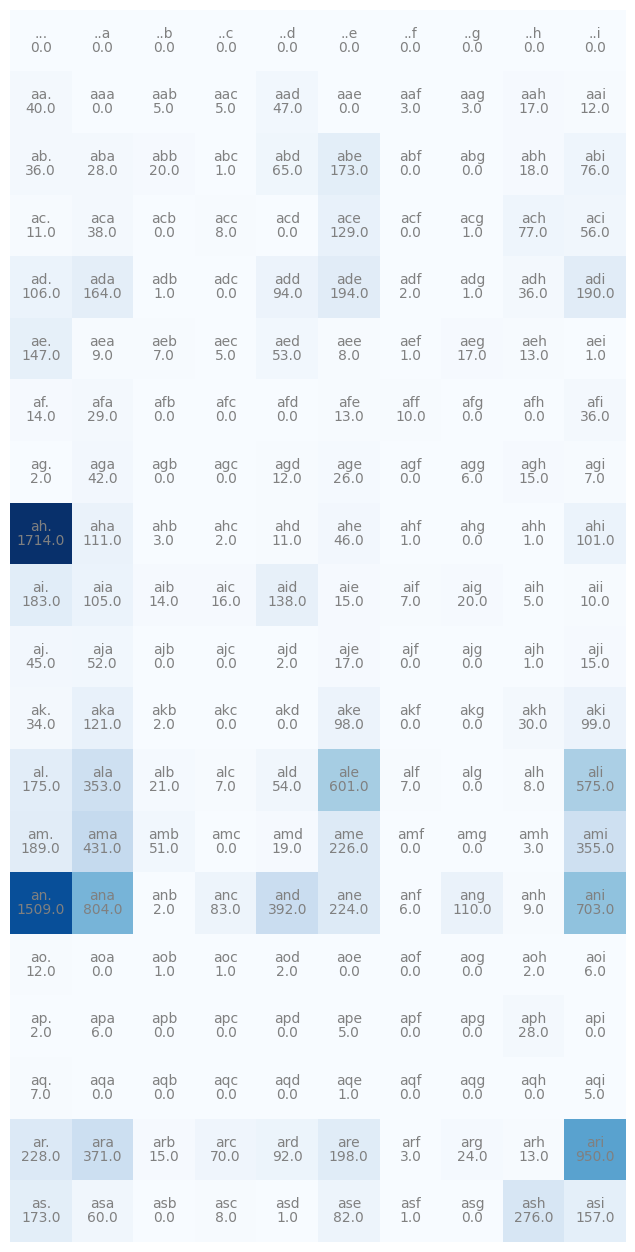

In [42]:
#Let's compute the matrix N with pr(l3 given l2 + l1)
N = torch.zeros(729,27)
for w in words:
    w = '.' + w + '.'
    k = len(w)
    for i in range(k-2):
        k = i+2
        c1 = w[i] + w[i+1]
        c2 = w[k] 
        i1 = stoi_pair[c1]
        i2 = stoi[c2]
        N[i1][i2]+=1 #count the nbr of apparition of the association of letters (c1, c2) (pr(c2 given c1))

#display the matrix in human-readable format
plt.figure(figsize=(16,16))

#show part of matrix N
i0, i1 = 0, 20
j0, j1 = 0, 10
N_sub = N[i0:i1, j0:j1]
plt.imshow(N_sub, cmap='Blues')
for i in range(i0,i1):
    for j in range(j0,j1):
        chstr = itos_pair[i] + itos[j] #display the combinaison of character
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N_sub[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')
plt.show()

#Compute probs matrix
P = N/N.sum(dim=1, keepdim=True)

In [69]:
#Then let's build a trigram training set
xs = []
ys = []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]): 
        ix1 = stoi_pair[ch1 +ch2]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = len(xs)


In [70]:
#Let's train a neural network on the trigram training set (on gpu)

#define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

W= torch.zeros(729,27,device=device) #start from probs matrix
W.requires_grad = True
lr=1

# training loop
for k in range(1000):
    # forward pass
    xenc = F.one_hot(xs.to(device), num_classes=729).float()  #encode each pair of letters (729 combinaisons)
    logits = xenc @ W                             
    counts = logits.exp()
    probs = counts / counts.sum(dim=1, keepdim=True) #softmax(x)= exp(z)/sum(exp(z))
    loss = -torch.log(probs[torch.arange(len(xs)), ys]).mean()

    # backward pass
    loss.backward()

    # update (the gradients)
    W.data += - lr* W.grad 
    W.grad= torch.zeros(729,27,device=device) #reinitialise grad

    print(loss.item())

3.295836925506592
3.2881646156311035
3.2804996967315674
3.2728421688079834
3.2651917934417725
3.257550001144409
3.249915361404419
3.2422890663146973
3.2346701622009277
3.227060556411743
3.2194583415985107
3.211864471435547
3.204279661178589
3.1967029571533203
3.1891355514526367
3.1815764904022217
3.1740267276763916
3.1664862632751465
3.158954620361328
3.151432514190674
3.1439197063446045
3.1364169120788574
3.1289238929748535
3.1214401721954346
3.113966941833496
3.106503486633301
3.0990500450134277
3.0916080474853516
3.0841758251190186
3.076754331588745
3.0693438053131104
3.0619442462921143
3.0545554161071777
3.047178268432617
3.0398123264312744
3.0324578285217285
3.0251150131225586
3.0177838802337646
3.010464668273926
3.003157615661621
2.9958627223968506
2.9885807037353516
2.9813103675842285
2.974052906036377
2.9668080806732178
2.9595768451690674
2.9523580074310303
2.945152759552002
2.9379608631134033
2.9307823181152344
2.923617362976074
2.916466236114502
2.9093291759490967
2.902205944

In [71]:
#the loss is satisfying: 0.76 after 1000 iterations (when we make more training (ex: 20000 training, loss=0.02)
# we tend to have even more succession of the same letters in most generated words

#Now let's sample from the trained neural net model (used computed parameters W)

g = torch.Generator(device=device).manual_seed(2147483647)

for k in range(10):
    out = []
    ix = 0
    for _ in range(10):
        x = F.one_hot(torch.tensor([ix]).to(device), num_classes=729).float() #vectorize the input into a vector of size 729 
        logits = x @W
        counts = logits.exp()
        probs = counts/counts.sum(dim=1, keepdim=True) #softmax
        ix =  torch.multinomial(probs, num_samples=1, generator=g).item() #draw new letter based on probs
        if ix == 0:
            break
        out.append(itos[ix])
    print(''.join(out))


kueqkwpwkp
wlllllllgo
mmmmmmmmmm
ksssssssxo
brrrrrrrrr
ddxennnnnn
prrrrrrrrn
piiiiiiiiz
ossssayyyy
tttiiiiiii


In [ ]:
# Exercise 4: let's build a better model
# Bengio et al. 2003 MLP language model paper, https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

In [15]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn.functional as F

In [12]:
# build the dataset (do not change this code)
block_size = 3
def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size #vector of size 3 (only zero)
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

X_train, Y_train = build_dataset(words[:n1]) #80% of words in training set
X_dev, Y_dev = build_dataset(words[n1:n2]) #10% of words in dev set
X_test, Y_test = build_dataset(words[n2:]) #10% of words in test set

In [7]:
emb_size = 300
hidden_size=128
nb_character=27

g = torch.Generator().manual_seed(2147483647)
C  = torch.randn((nb_character, emb_size), generator=g)
W1 = torch.randn((emb_size*block_size, hidden_size), generator=g)
b1 = torch.randn(hidden_size, generator=g)
W2 = torch.randn((hidden_size, nb_character), generator=g)
b2 = torch.randn(nb_character, generator=g)

parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

In [63]:
# init weights (use torch.nn.init)
b1 = torch.nn.init.zeros_(b1)
b2 = torch.nn.init.zeros_(b2)
W1 = torch.nn.init.zeros_(W1)
W2 = torch.nn.init.zeros_(W2)

In [64]:
stepi = []
lossi = []

In [234]:
for p in parameters:
    p.requires_grad = True

In [ ]:
# training loop (use the cross-entropy loss)

batch_size = 3000
lr=1
for i in range(20000):
    
    # minibatch
    ix = torch.randint(0, X_train.shape[0], (batch_size,)) #indices of minibatch

    # forward pass
    emb = C[X_train[ix]] #embedding of mini-batch 
    h = torch.tanh( emb.view(len(emb), -1) @ W1 + b1)  # hint: to flatten a tensor x, use x.view (-1, ...) 
    logits = h @ W2 + b2                   
    loss = F.cross_entropy(logits, Y_train[ix]) #cross entropy between output of NN (logit) and real value (Y_train[ix])
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data+= -lr* p.grad
    stepi.append(i)
    lossi.append(loss.log10().item())
    print(i, loss)

0 tensor(3.2958, grad_fn=<NllLossBackward0>)
1 tensor(3.2539, grad_fn=<NllLossBackward0>)
2 tensor(3.2155, grad_fn=<NllLossBackward0>)
3 tensor(3.1865, grad_fn=<NllLossBackward0>)
4 tensor(3.1527, grad_fn=<NllLossBackward0>)
5 tensor(3.1215, grad_fn=<NllLossBackward0>)
6 tensor(3.1118, grad_fn=<NllLossBackward0>)
7 tensor(3.0897, grad_fn=<NllLossBackward0>)
8 tensor(3.0698, grad_fn=<NllLossBackward0>)
9 tensor(3.0746, grad_fn=<NllLossBackward0>)
10 tensor(3.0548, grad_fn=<NllLossBackward0>)
11 tensor(3.0449, grad_fn=<NllLossBackward0>)
12 tensor(3.0436, grad_fn=<NllLossBackward0>)
13 tensor(3.0220, grad_fn=<NllLossBackward0>)
14 tensor(3.0128, grad_fn=<NllLossBackward0>)
15 tensor(3.0048, grad_fn=<NllLossBackward0>)
16 tensor(2.9976, grad_fn=<NllLossBackward0>)
17 tensor(2.9986, grad_fn=<NllLossBackward0>)
18 tensor(2.9845, grad_fn=<NllLossBackward0>)
19 tensor(2.9778, grad_fn=<NllLossBackward0>)
20 tensor(2.9859, grad_fn=<NllLossBackward0>)
21 tensor(2.9712, grad_fn=<NllLossBackward0>

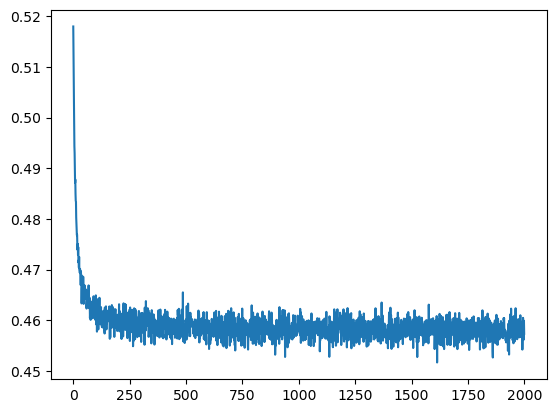

In [237]:
plt.plot(stepi, lossi)
plt.show()

In [ ]:
# compute the train and val loss

# init weights (use torch.nn.init)
b1 = torch.nn.init.zeros_(b1)
b2 = torch.nn.init.zeros_(b2)
W1 = torch.nn.init.zeros_(W1)
W2 = torch.nn.init.zeros_(W2)
C  = torch.randn((nb_character, emb_size), generator=g)

lossi=[] #train loss
lossival=[] #validation loss
stepi=[] #iterations

batch_size = 3000
lr=1
for i in range(2000):
    
    # minibatch
    ix = torch.randint(0, X_train.shape[0], (batch_size,)) #indices of minibatch

    # forward pass
    emb = C[X_train[ix]] #embedding of mini-batch 
    h = torch.tanh( emb.view(len(emb), -1) @ W1 + b1)  # hint: to flatten a tensor x, use x.view (-1, ...) 
    logits = h @ W2 + b2             
    loss = F.cross_entropy(logits, Y_train[ix]) #cross entropy between output of NN (logit) and real value (Y_train[ix])
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data+= -lr* p.grad
    stepi.append(i)
    lossi.append(loss.log10().item())

    #validation step
    with torch.no_grad():
        iy= torch.randint(0, X_dev.shape[0], (batch_size,)) #mini-batch for validation 
        emb = C[X_dev[iy]] #embedding of mini-batch 
        h = torch.tanh( emb.view(len(emb), -1) @ W1 + b1) 
        logits_val = h @ W2 + b2                     
        lossval = F.cross_entropy(logits, Y_dev[iy]) 
        lossival.append(lossval.log10().item())

Training loss:0.4594 
Validation loss:0.4607


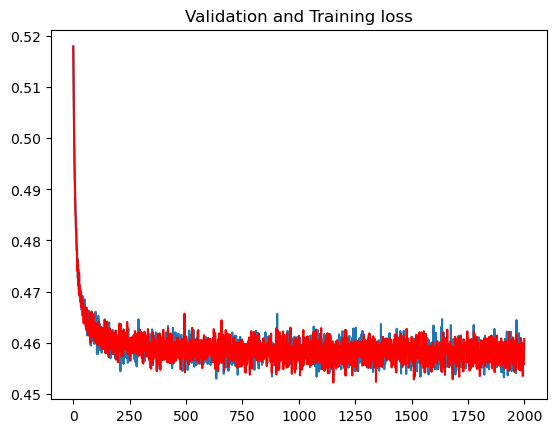

In [239]:
plt.plot(stepi, lossi, label="Training loss")
plt.plot(stepi, lossival, color= "red", label = "Validation loss")
plt.title("Validation and Training loss")

print(f"Training loss:{round(lossi[-1],4)} \nValidation loss:{round(lossival[-1],4)}")

In [ ]:
# compute the train and val loss.  here are the initial results I got.  
#Training loss:0.4594 
#Validation loss:0.4607


# Improve the loss by playing with the hyper-params and learning rate policy and report the results here.

#Below,  I reduced the batching size to 10000 and included a scheduler with patience 20, that reduced the learning by 0.95
#I made ... iteration of training on gpu
# Training loss:0.4483 and Validation loss:0.4523 ( just a little bit better than previous training)

#define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# init parameters (use torch.nn.init)
g = torch.Generator(device=device).manual_seed(2147483647)
C  = torch.nn.Parameter(torch.randn(nb_character, emb_size, generator=g, device=device))
W1 = torch.nn.Parameter(torch.zeros_like(W1, device=device))
b1 = torch.nn.Parameter(torch.zeros_like(b1, device=device))
W2 = torch.nn.Parameter(torch.zeros_like(W2, device=device))
b2 = torch.nn.Parameter(torch.zeros_like(b2, device=device))

parameters = [C, W1, b1, W2, b2]


for p in parameters:
    p.requires_grad = True

lossi=[] #train loss
lossival=[] #validation loss
stepi=[] #iterations

batch_size = 2000
lr=1

for i in range(10000):
    
    # minibatch
    ix = torch.randint(0, X_train.shape[0], (batch_size,), ) #indices of minibatch

    # forward pass
    emb = C[X_train[ix]].to(device) #embedding of mini-batch 
    h = torch.tanh( emb.view(len(emb), -1) @ W1 + b1)  # hint: to flatten a tensor x, use x.view (-1, ...) 
    logits = h @ W2 + b2                 
    loss = F.cross_entropy(logits, Y_train[ix].to(device)) #cross entropy between output of NN (logit) and real value (Y_train[ix])
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data -= lr* p.grad
    stepi.append(i)
    lossi.append(loss.log10().item())
    
    #scheduler of learning rate if loss does not decrease more than "treshold" on "patience" iterations
    patience=20
    treshold=1e-2
    if len(stepi)>100: #wait at least 100 step before reducing lr
        if (len(lossi)>patience) & (lr>1e-3):
            if ((lossi[-patience-1]-lossi[-1]) < treshold):
                lr=lr*0.95
                print(rf"lr decreased to {lr}")

    #validation step
    with torch.no_grad():
        iy= torch.randint(0, X_dev.shape[0], (batch_size,)) #mini-batch for validation 
        emb = C[X_dev[iy]].to(device) #embedding of mini-batch 
        h = torch.tanh( emb.view(len(emb), -1) @ W1 + b1) 
        logits_val = h @ W2 + b2                     
        lossval = F.cross_entropy(logits, Y_dev[iy].to(device)) 
        lossival.append(lossval.log10().item())
        print(i, loss, lossval)

print(f"Training loss:{round(lossi[-1],4)} \nValidation loss:{round(lossival[-1],4)}")


0 tensor(3.2958, device='cuda:0', grad_fn=<NllLossBackward0>) tensor(3.2958, device='cuda:0')
1 tensor(3.2526, device='cuda:0', grad_fn=<NllLossBackward0>) tensor(3.2539, device='cuda:0')
2 tensor(3.2170, device='cuda:0', grad_fn=<NllLossBackward0>) tensor(3.2177, device='cuda:0')
3 tensor(3.1848, device='cuda:0', grad_fn=<NllLossBackward0>) tensor(3.1877, device='cuda:0')
4 tensor(3.1505, device='cuda:0', grad_fn=<NllLossBackward0>) tensor(3.1518, device='cuda:0')
5 tensor(3.1229, device='cuda:0', grad_fn=<NllLossBackward0>) tensor(3.1247, device='cuda:0')
6 tensor(3.1039, device='cuda:0', grad_fn=<NllLossBackward0>) tensor(3.0966, device='cuda:0')
7 tensor(3.0876, device='cuda:0', grad_fn=<NllLossBackward0>) tensor(3.0726, device='cuda:0')
8 tensor(3.0516, device='cuda:0', grad_fn=<NllLossBackward0>) tensor(3.0499, device='cuda:0')
9 tensor(3.0442, device='cuda:0', grad_fn=<NllLossBackward0>) tensor(3.0283, device='cuda:0')
10 tensor(3.0112, device='cuda:0', grad_fn=<NllLossBackward0

In [17]:
# sample from the model
g = torch.Generator(device=device).manual_seed(2147483647 + 4)

for _ in range(20):
    
    out = []
    context = [0]*block_size
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(len(emb),-1)@ W1+b1)
      logits = torch.tanh(h@W2 + b2)
      probs = F.softmax(logits, dim=1) #softmax
      ix = torch.multinomial(probs, num_samples=1, generator=g).item() #draw new letter based on probs
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

    #worse than exo 2 (maybe try training on cuda)

stknyslxseznugc.
dmidenyrlegda.
oiyolate.
imsrgydlinrgidjt.
ohhyskahlqrnheeiejlraldncknzoaaik.
g.
zydaknwopqnileed.
kilsiakjiid.
.
sm.
bvuno.
r.
xcryendetsciaaeeeashoroiy.
ysskl.
drnamn.
bdyelynrurloeeemldzeaooyyc.
oohd.
wjuqolydjlbyf.
dabi.
atqzyno.
